In [1]:
import feature_creator as fc
import pandas as pd
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,cross_val_score
from sklearn.base import clone
import numpy as np
from copy import copy
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [2]:
df = pd.read_csv('spambase.csv')
X = df.drop(columns=['spam']).to_numpy()
y = df['spam'].to_numpy()
print(X.shape)
print(y.shape)

(4601, 57)
(4601,)


In [3]:
model =  XGBClassifier()
feature_model = DecisionTreeRegressor(max_depth=5)

In [4]:
#Baseline
scores = cross_val_score(model, X, y, cv=10, scoring='f1')
np.mean(scores)

0.9291562963145171

In [5]:
feature_models, ga_fitness = fc.feature_creator(model,feature_model,X,y,n_features=2,batch_size=0.03)

In [6]:
import matplotlib.pyplot as plt

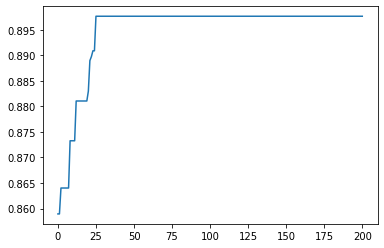

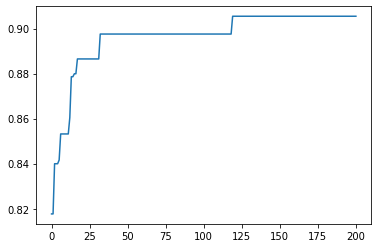

In [7]:
for data in ga_fitness:
    plt.plot(data)
    plt.show()

In [14]:
len(data)

201

In [8]:
new_X = copy(X)
for f in feature_models:
    new_X = np.hstack((new_X,np.array([fc.get_feature_values(f,X)]).T))
    

In [9]:
print(new_X.shape)

(4601, 59)


In [10]:
scores = cross_val_score(model, X, y, cv=10, scoring='f1')
print(f'{np.mean(scores)}+-{np.std(scores)}')

0.9291562963145171+-0.03477263386789324


In [11]:
scores = cross_val_score(model, new_X, y, cv=10, scoring='f1')
print(f'{np.mean(scores)}+-{np.std(scores)}')

0.9289489736783654+-0.037581159456763054


In [21]:
model.__str__()[:15]

'XGBClassifier(b'